In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
female_df = pd.read_csv('ANSUR II FEMALE Public.csv')

In [3]:
male_df = pd.read_csv('ANSUR II MALE Public.csv', encoding='latin')

In [4]:
female_df['stature'] = female_df['stature'] / 10
female_df['weightkg'] = female_df['weightkg'] / 10
# female_df['Gender'] = 0
male_df['stature'] = male_df['stature'] / 10
male_df['weightkg'] = male_df['weightkg'] / 10
# male_df['Gender'] = 1

In [5]:
female_df = female_df.sort_values(by=['stature'])
male_df = male_df.sort_values(by=['stature'])

In [6]:
female_df = female_df.reset_index(drop=True)
male_df = male_df.reset_index(drop=True)

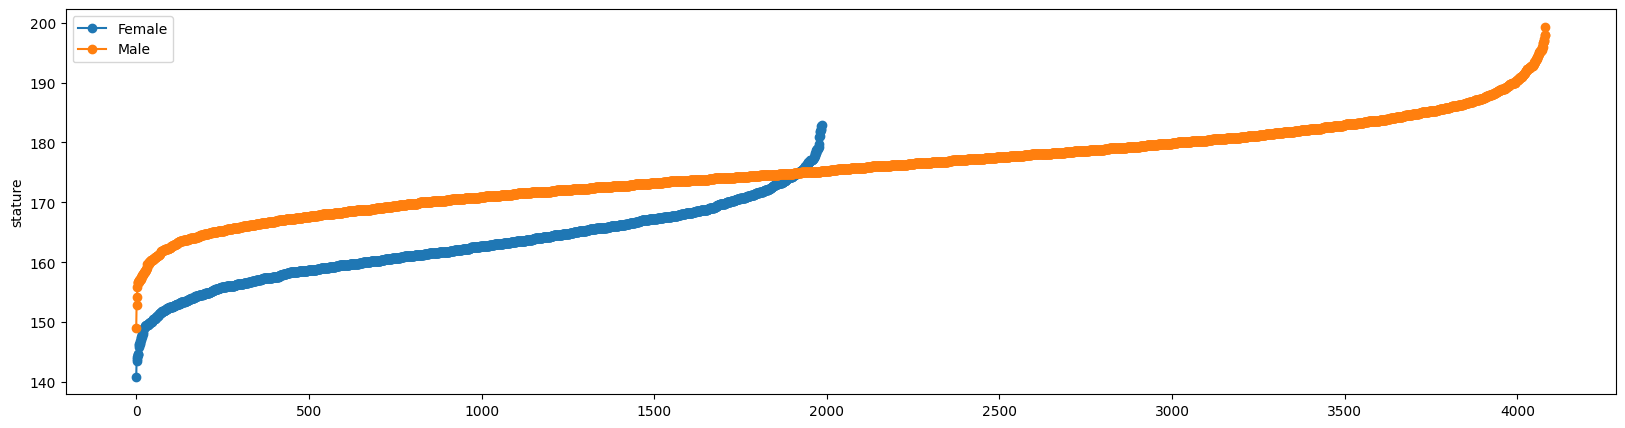

In [7]:
plt.figure(figsize=(20, 5))
plt.plot(female_df['stature'], marker='o')
plt.plot(male_df['stature'], marker='o')
plt.legend(['Female', 'Male'])
plt.ylabel('stature')
plt.show()

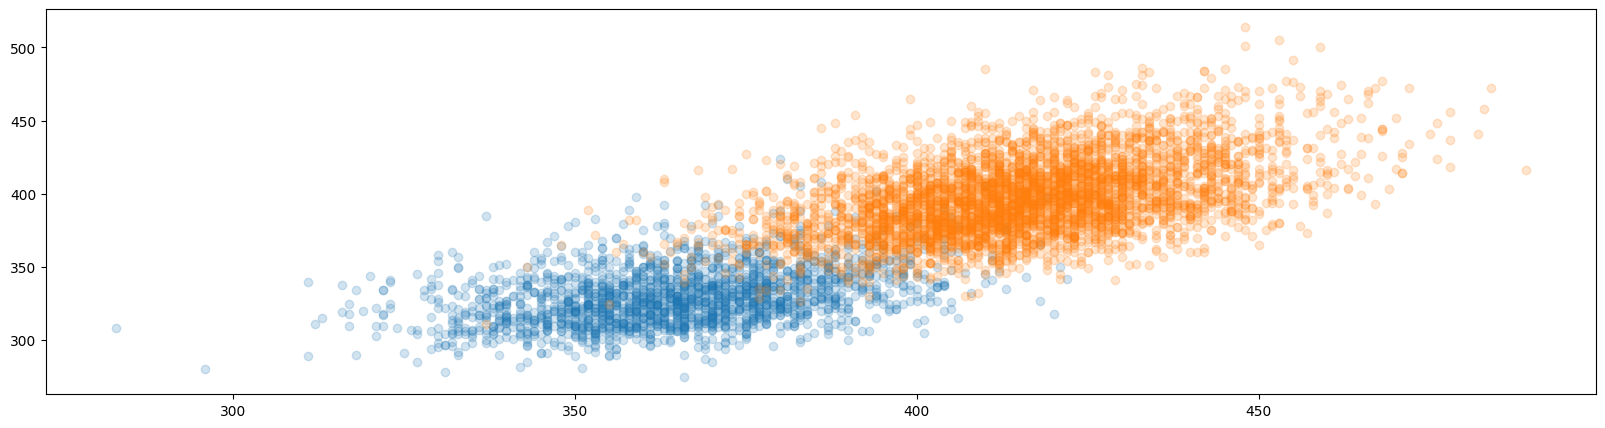

In [8]:
plt.figure(figsize=(20, 5))
plt.scatter(female_df['biacromialbreadth'], female_df['neckcircumference'], alpha=.2)
plt.scatter(male_df['biacromialbreadth'], male_df['neckcircumference'], alpha=.2)
plt.show()

In [9]:
df = pd.concat([female_df, male_df])
len(df)

6068

In [10]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

print(len(train_df))
print(len(test_df))

4854
1214


In [11]:
train_df = train_df[['biacromialbreadth', 'neckcircumference', 'Gender']]
test_df = test_df[['biacromialbreadth', 'neckcircumference', 'Gender']]

In [12]:
x_train = train_df[['biacromialbreadth', 'neckcircumference']].reset_index(drop=True)
y_train = train_df['Gender'].reset_index(drop=True)

x_test = test_df[['biacromialbreadth', 'neckcircumference']].reset_index(drop=True)
y_test = test_df['Gender'].reset_index(drop=True)

In [13]:
from k_nearest_neighbors import KNearestNeighbors

model = KNearestNeighbors(x_train, y_train)

Processing Data: 100%|██████████| 1214/1214 [01:28<00:00, 13.65it/s]


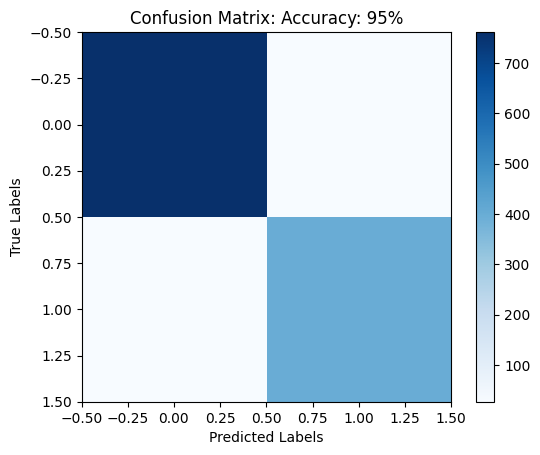

0.9546952224052718

In [14]:
model.score(x_test, y_test, k=3, confusion_matrix=True) 

Processing Data: 100%|██████████| 1214/1214 [01:32<00:00, 13.15it/s]


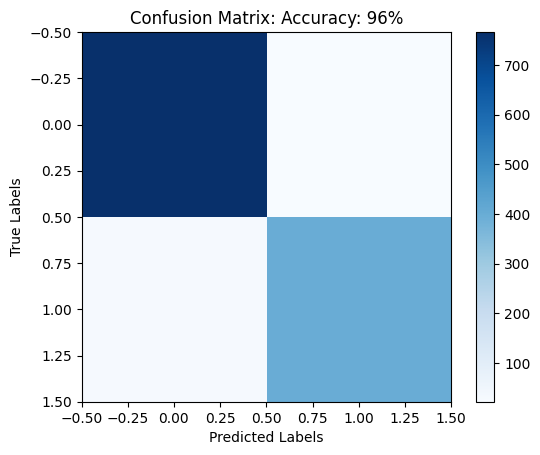

0.9588138385502472

In [15]:
model.score(x_test, y_test, k=5, confusion_matrix=True) 

Processing Data: 100%|██████████| 1214/1214 [01:35<00:00, 12.77it/s]


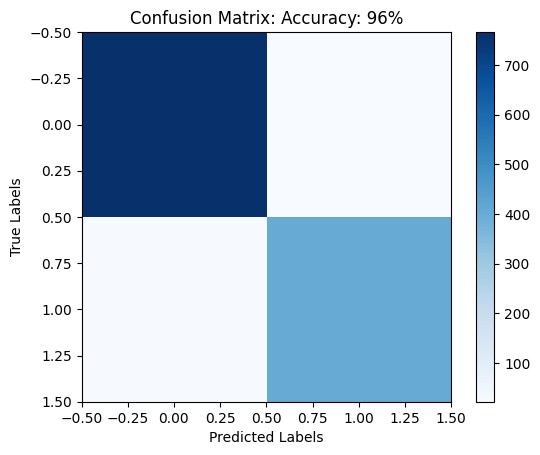

0.9612850082372323

In [16]:
model.score(x_test, y_test, k=7, confusion_matrix=True) 

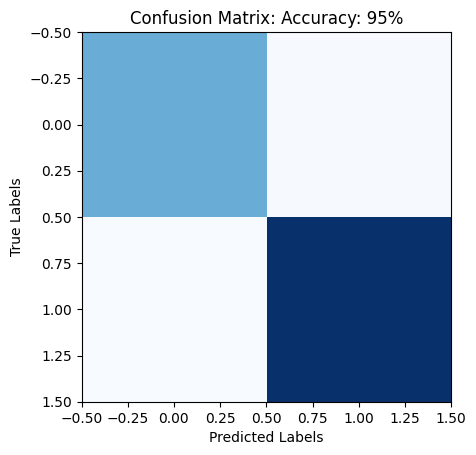

0.9546952224052718

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

sklearn_model = KNeighborsClassifier(n_neighbors=3)
sklearn_model.fit(x_train, y_train)

y_pred = sklearn_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

plt.imshow(confusion_matrix(y_test, y_pred), interpolation='nearest', cmap='Blues')
plt.title(f'Confusion Matrix: Accuracy: {round(accuracy * 100)}%')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
accuracy

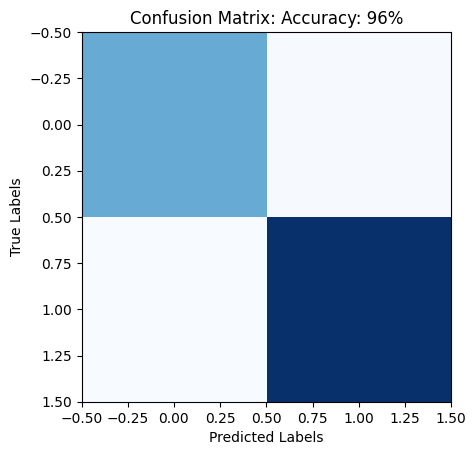

0.9604612850082372

In [23]:
sklearn_model = KNeighborsClassifier(n_neighbors=5)
sklearn_model.fit(x_train, y_train)

y_pred = sklearn_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

plt.imshow(confusion_matrix(y_test, y_pred), interpolation='nearest', cmap='Blues')
plt.title(f'Confusion Matrix: Accuracy: {round(accuracy * 100)}%')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
accuracy

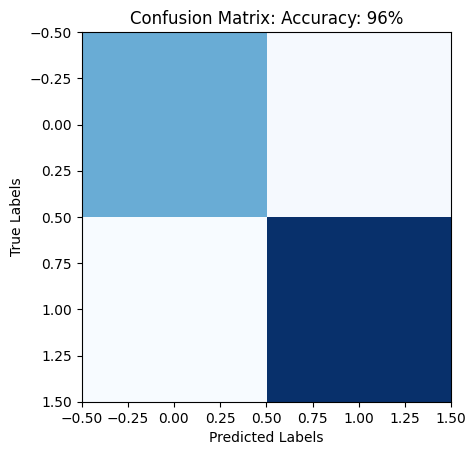

0.9604612850082372

In [24]:
sklearn_model = KNeighborsClassifier(n_neighbors=7)
sklearn_model.fit(x_train, y_train)

y_pred = sklearn_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)

plt.imshow(confusion_matrix(y_test, y_pred), interpolation='nearest', cmap='Blues')
plt.title(f'Confusion Matrix: Accuracy: {round(accuracy * 100)}%')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
accuracy